# Assignment 02
# Pathirana R.P.U.A.
# 190432J


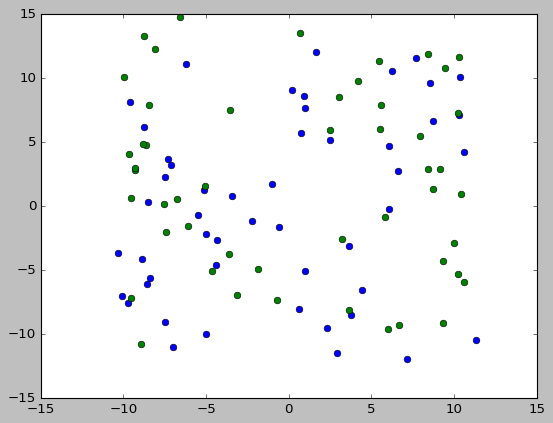

In [29]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib import style
style.use('classic')
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0,2*np.pi, half_n)
n = s*np.random.randn(half_n)

x , y = (r+n)*np.cos(t) , (r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m, b = -1,2
x = np.linspace(-12,12,half_n)
y = m*x +b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X = np.vstack((X_circ,X_line))




plt.plot(X_circ,X_line, 'o')

newX = X[0:,0]
newY = X[0:,1]



In [ ]:
n = N

u11 = np.sum((newX - np.mean(newX))**2)
u12 = np.sum((newX - np.mean(newX))*(newY - np.mean(newY)))
u21 = u12
u22 = np.sum((newY - np.mean(newY))**2)

U = np.array([[u11,u12],[u21,u22]])
W,V = np.linalg.eig(U)
ev_corresponding_to_smallest_ev = V[:,np.argmin(W)] 

a = ev_corresponding_to_smallest_ev[0]
b = ev_corresponding_to_smallest_ev[1]
d = a*np.mean(newX) + b*np.mean(newY)

mstar = -a/b
cstar = d/b

plt.plot(x,y,'o',label='Noisy points')
plt.plot([x[0],x[-1]],[m*x[0]+c,m*x[-1] + c], color='g',linewidth=2, label=r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0] + cstar,mstar*x[-1] + cstar], color='r', linewidth=2,label=r'Estimated line')
plt.legend(loc = 'best')
plt.show()

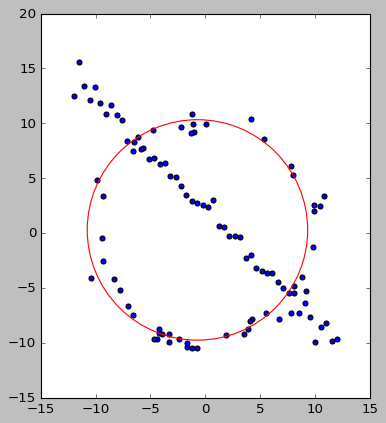

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

def data_generator():
	N = 100
	half_n = N//2
	r = 10
	s = r/16
	t = np.random.uniform(0,2*np.pi, half_n)
	n = s*np.random.randn(half_n)

	x , y = (r+n)*np.cos(t) , (r+n)*np.sin(t)
	X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
	m, b = -1,2
	x = np.linspace(-12,12,half_n)
	y = m*x +b + s*np.random.randn(half_n)
	X_line = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
	X = np.vstack((X_circ,X_line))


	return X[0:,0], X[0:,1]

def circle_func(a, b, r, x):
	return (np.sqrt(r**2-(x-a)**2) + b, -np.sqrt(r**2-(x-a)**2) + b)

class RANSAC:
	def __init__(self, x_data, y_data, n):
		self.x_data = x_data
		self.y_data = y_data
		self.n = n
		self.d_min = 99999
		self.best_model = None

	def random_sampling(self):
		sample = []
		save_ran = []
		count = 0

		# get three points from data
		while True:
			ran = np.random.randint(len(self.x_data))

			if ran not in save_ran:
				sample.append((self.x_data[ran], self.y_data[ran]))
				save_ran.append(ran)
				count += 1

				if count == 3:
					break

		return sample

	def make_model(self, sample):
		# calculate A, B, C value from three points by using matrix
	
		pt1 = sample[0]
		pt2 = sample[1]
		pt3 = sample[2]

		A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
		B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
		inv_A = inv(A)

		c_x, c_y = np.dot(inv_A, B) / 2
		c_x, c_y = c_x[0], c_y[0]
		r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)

		return c_x, c_y, r

	def eval_model(self, model):
		d = 0
		c_x, c_y, r = model

		for i in range(len(self.x_data)):
			dis = np.sqrt((self.x_data[i]-c_x)**2 + (self.y_data[i]-c_y)**2)

			if dis >= r:
				d += dis - r
			else:
				d += r - dis
		
		return d

	def execute_ransac(self):
		# find best model
		for i in range(self.n):
			model = self.make_model(self.random_sampling())
			d_temp = self.eval_model(model)
			
			if self.d_min > d_temp:
				self.best_model = model
				self.d_min = d_temp


if __name__ == '__main__':
	# make data
	x_data, y_data = data_generator()

	# show data by scatter type
	plt.scatter(x_data, y_data, c='blue', marker='o', label='data')

	# make ransac class
	# n: how many times try sampling
	ransac = RANSAC(x_data, y_data, 50)
	
	# execute ransac algorithm
	ransac.execute_ransac()
	
	# get best model from ransac
	a, b, r = ransac.best_model[0], ransac.best_model[1], ransac.best_model[2]

	# show result
	circle = plt.Circle((a, b), radius=r, color='r', fc='y', fill=False)
	plt.gca().add_patch(circle)

	plt.axis('scaled')

	# plt.tight_layout()
	plt.show()

In [32]:
# Libraries
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt


In [33]:
# Returns co-ordinate points of circles 
def GetCirclePoints(center, r):
    theta = np.linspace(0,2*np.pi,100)
    x = center[0] + r*np.cos(theta)
    y = center[0] + r*np.sin(theta)

    return(x,y)

# Returns mean absolute error
def MeanAbsErr(points, center, r):
    c1, c2 = center[0], center[1]
    distance = np.sqrt((points[:,0]-c1)**2 + (points[:,1]-c2)**2)
    err = np.sum(abs(distance-r))/len(points)
    return err

# Detects inlier points
def Inliers(points, center, r, threshDistance):
    lowThresh , highThresh = r-threshDistance, r+threshDistance  #range of the threshold
    distance = np.sqrt((points[:,0]-center[0])**2+(points[:,1]-center[1])**2)
    Indices = [x for x in range (0, len(points)) if lowThresh<=abs(distance[x])<=highThresh]
    inliers = np.array([list(points[i]) for i in Indices])
    return inliers

    

In [34]:
#best RANSAC with maximun inlier count
def bestRANSAC(ran):
    maxInlierCount = 0
    bestRAN = [[[],[]],[[],[]],[],[],[[],[]]]
    for i in range(0, len(ran[0][0])):
        if maxInlierCount < len(ran[2][i]):
            maxInlierCount = len(ran[2][i]) 
            for j in range (0,5):
                if j==2 or j ==3 :
                    bestRAN[j]=ran[j][i]
                else:
                    bestRAN[j][0]=ran[j][0][i]
                    bestRAN[j][1]=ran[j][1][i]
        elif maxInlierCount == len(ran[2][i]):
            # if inlier counts are equal then consider the minimum mean abs err
            if (bestRAN[3]> ran[3][i]):
                maxInlierCount = len(ran[2][i])
            for j in range (0,5):
                if j==2 or j ==3 :
                    bestRAN[j]=ran[j][i]
                else:
                    bestRAN[j][0]=ran[j][0][i]
                    bestRAN[j][1]=ran[j][1][i]
    print('Inlier Count : ',maxInlierCount)
    return bestRAN      



In [38]:
# Get RANSAC circles
def RANSAC_circles(points , N , iterations, inlierCount, maxThresh , candidate=0):
    maxRadius = (abs(points[:,0].min())+abs(points[:,0].max()))/2+5 # Maximum radius
    RAN = [[[],[]],[[],[]],[],[],[[],[]]]
    for i in range(0, iterations):
        point1,point2,point3 = points[np.random.choice(points.shape[0],3,replace=False),:]

        #calcluations of center and radius
        A = np.array([[2*point1[0], 2*point1[1], 1], [2*point2[0], 2*point2[1], 1], [2*point3[0], 2*point3[1], 1]])
        B = np.array([[point1[0]**2+point1[1]**2], [point2[0]**2+point2[1]**2], [point3[0]**2+point3[1]**2]])
        res = np.linalg.pinv(A) @ B
        g, f = res[0][0], res[1][0]
        r = np.sqrt(res[2]+g**2+f**2)

        if (r[0]>maxRadius):
            continue
        InlierPoints =  Inliers(points, (g,f), r, maxThresh) # Inlier points
        if (inlierCount <= len(InlierPoints)):
            # candidate = 1  for higher accuracy
            if (candidate ==1):
                RAN[0][0].append((g,f))
                RAN[1][0].append(np.array([[point1[0], point1[1]], [point2[0], point2[1]], [point3[0], point3[1]]]))
                RAN[2].append(InlierPoints)
                error = MeanAbsErr(InlierPoints,(g,f),r)
                RAN[3].append(error)
                RAN[4][0].append(r)

            # Candidate = 0 first candidate cicle for the selected random sample
            if (candidate ==0):
                RAN[0][1].append((g,f))
                RAN[1][1].append(np.array([[point1[0], point1[1]], [point2[0], point2[1]], [point3[0], point3[1]]]))
                RAN[4][1].append(r)
                RAN2 = RANSAC_circles(InlierPoints,len(InlierPoints),100,inlierCount, maxThresh,1)
                for i in range (0,len(RAN2[0][0])):
                    RAN[0][0].append(RAN2[0][0][i])
                    RAN[0][1].append((g, f))
                    RAN[1][0].append(RAN2[1][0][i])
                    RAN[1][1].append(np.array([[point1[0], point1[1]], [point2[0], point2[1]], [point3[0], point3[1]]]))
                    RAN[2].append(RAN2[2][i])
                    RAN[3].append(RAN2[3][i])
                    RAN[4][0].append(RAN2[4][0][i])
                    RAN[4][1].append(r)
    return RAN




Inlier Count :  35


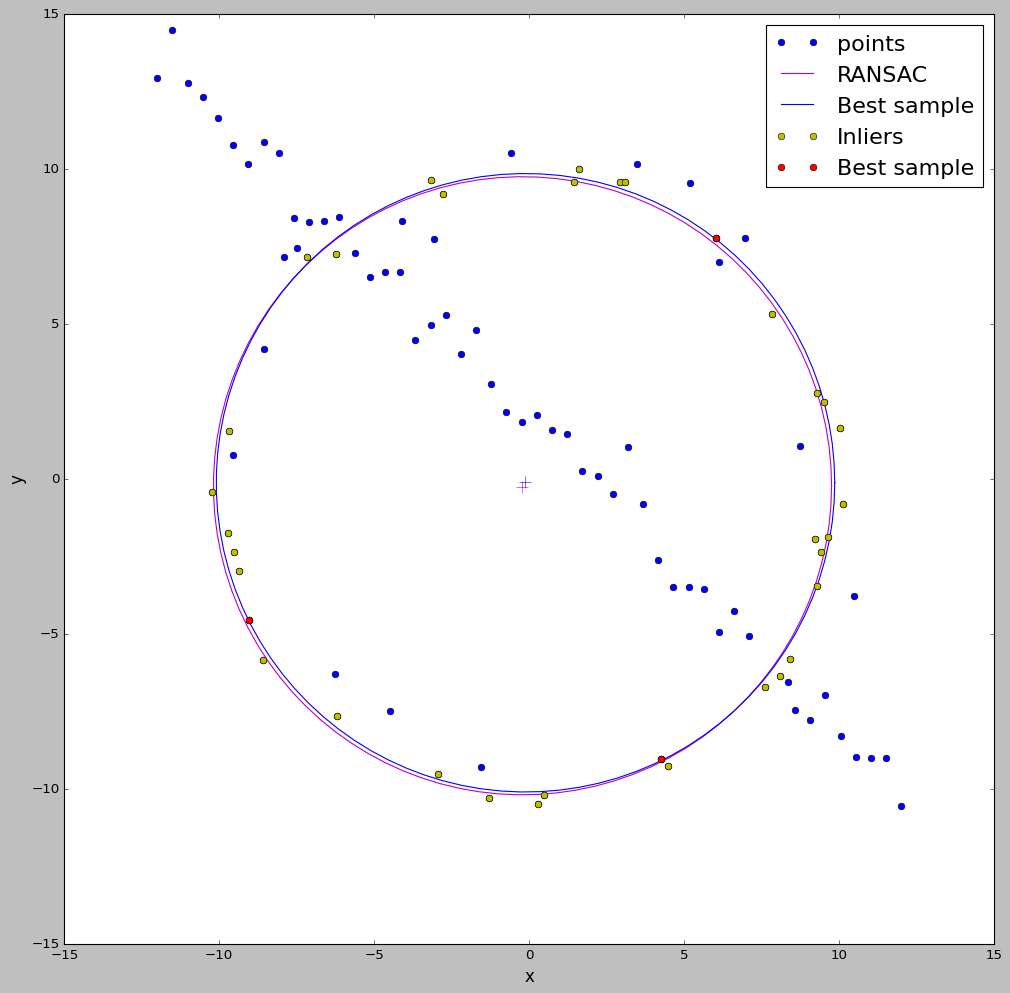

In [45]:
# sample points
# np . random . seed ( 0 )
N = 100
half_n = N// 2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))

X = X[np.argsort(X[:, 0])] # sort

# getting RANSAC and best circle fitting
data = RANSAC_circles(X, N, 100, 20, 0.5)
best_ran = bestRANSAC(data)

center_ran, center_best = best_ran[0][0], best_ran[0][1]
sample_ran, sample_best = best_ran[1][0], best_ran[1][1]
inlier_points = best_ran[2]
error = best_ran[3]
r_ran, r_best = best_ran[4][0], best_ran[4][1]
circle_ran = GetCirclePoints(center_ran, r_ran)
circle_best = GetCirclePoints(center_best, r_best)

fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(X[:, 0], X[:, 1], 'bo', label='points')
ax.plot(center_ran[0], center_ran[1], 'm+', markersize=10)
ax.plot(circle_ran[0], circle_ran[1], 'm', label='RANSAC')
ax.plot(center_best[0], center_best[1], 'b+', markersize=10)
ax.plot(circle_best[0], circle_best[1], 'b', label='Best sample')
ax.plot(inlier_points[:, 0], inlier_points[:, 1], 'yo', label='Inliers')
ax.plot(sample_best[:, 0], sample_best[:, 1], 'ro', label='Best sample')
ax.set_aspect('equal')
ax.legend(loc='best', fontsize=20)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

plt.show()

# Question 2

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# gets coordinates of clicked points
def getCoordinates(event, x,y, flags,params):
    global count 
    if event == cv.EVENT_LBUTTONDOWN:
        selectedPoints[count] = (x,y)
        count +=1
        
        


In [6]:
def mouseClickedPoints(img):
    while True:
        for i in range(0, 4):
            # show a circled on clicked points
            cv.circle(img, (selectedPoints[i][0], selectedPoints[i][1]), 2, (0, 0, 255), cv.FILLED)
        
        if count==4:
            cv.destroyAllWindows()
            break
        
        # showing the image
        cv.imshow('image', img)
        cv.setMouseCallback('image', getCoordinates)
        cv.waitKey(1)


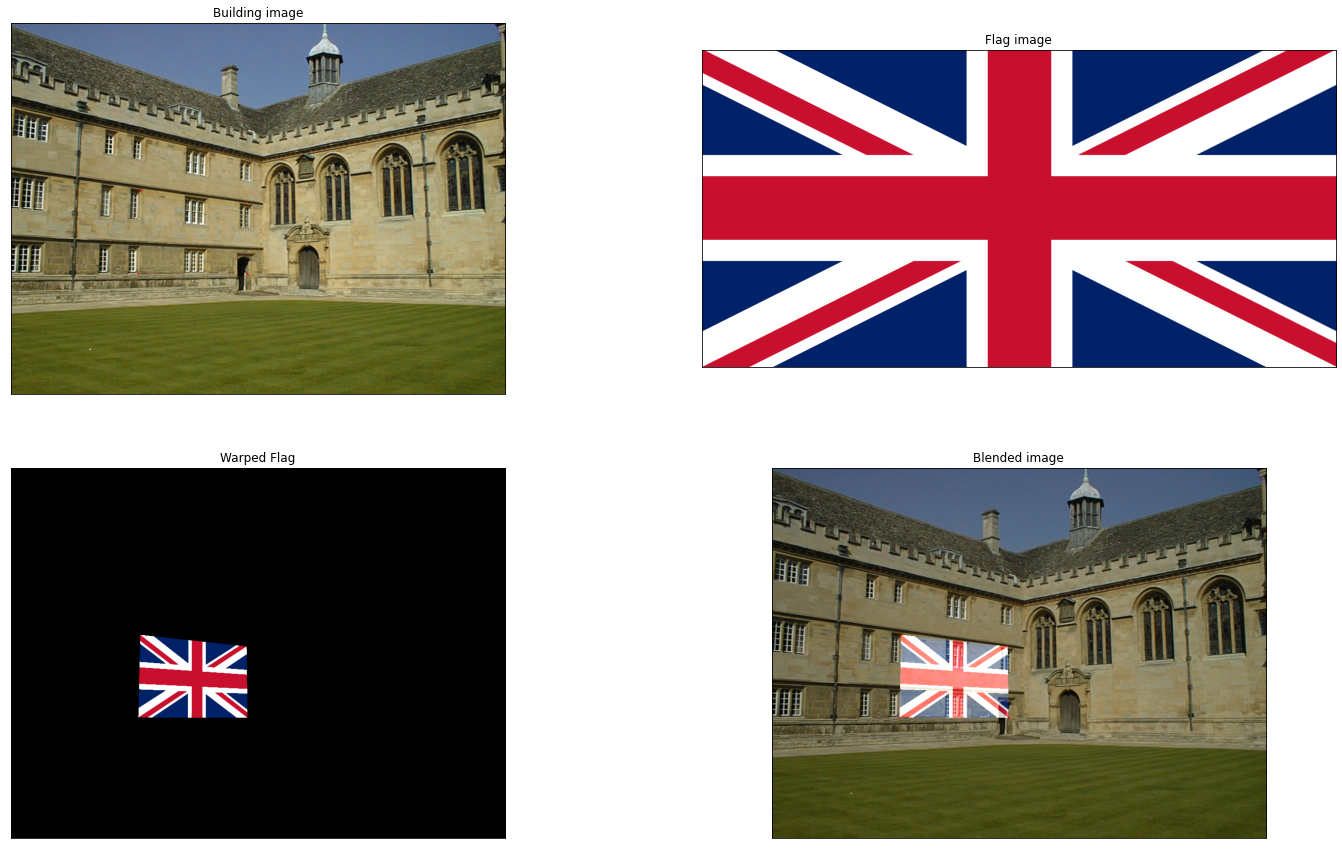

In [22]:
architectural_img = cv.imread('001.jpg')
assert architectural_img is not None
flag = cv.imread('flag.png')
assert flag is not None

selectedPoints = np.array([(0,0),(0,0),(0,0),(0,0)])
count = 0
mouseClickedPoints(architectural_img)

architectural_img = cv.cvtColor(architectural_img, cv.COLOR_BGR2RGB)
flag = cv.cvtColor(flag, cv.COLOR_BGR2RGB)

flag_points = np.array([(0, 0), (flag.shape[1], 0), (flag.shape[1], flag.shape[0]), (0, flag.shape[0])])   # corner points of the flag

h, status = cv.findHomography(flag_points, selectedPoints)              # homography
output_img = cv.warpPerspective(flag, h, (architectural_img.shape[1], architectural_img.shape[0]))        # warping flag image into building image
blend_img = cv.addWeighted(architectural_img, 0.8, output_img, 0.8, 0)           # blending flag image into building image

fig, ax = plt.subplots(2, 2, figsize=(25, 15))
ax[0][0].imshow(architectural_img)
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])
ax[0][0].set_title('Building image')

ax[0][1].imshow(flag)
ax[0][1].set_xticks([])
ax[0][1].set_yticks([])
ax[0][1].set_title('Flag image')

ax[1][0].imshow(output_img)
ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][0].set_title('Warped Flag')

ax[1][1].imshow(blend_img)
ax[1][1].set_xticks([])
ax[1][1].set_yticks([])
ax[1][1].set_title('Blended image')

plt.show()



In [21]:
print(flag.shape[0],flag.shape[1])

960 1920


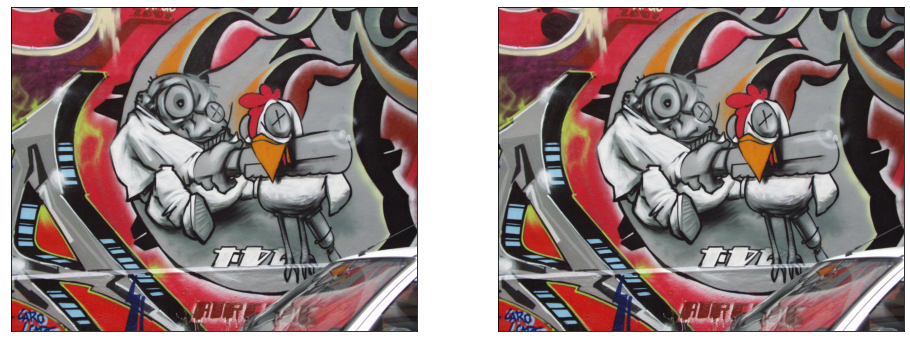

In [24]:
img1 = cv.imread('img1.ppm')
img5 = cv.imread('img1.ppm')
assert img1 is not None
assert img5 is not None

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2,sharex='all', sharey='all', figsize=(16, 8))
ax[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(img5, cmap='gray')

ax[0].set_xticks([])
ax[0].set_yticks([])

plt.show()
